# 웹드라이버 매니저 설치

In [ ]:
!pip install selenium
!pip install webdriver-manager
!pip install beautifulsoup4
!pip install --cask chromedriver 

     |████████████████████████████████| 904 kB 5.1 MB/s 

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --cask


### beatuifulsoup 


HTML정보로 부터 원하는 데이터를 가져오기 쉽게, 비슷한 분류의 데이터별로 나누어주는(parsing) 파이썬 라이브러리

BeautifulSoup은 HTML이나 XML에서 데이터를 추출하는 파이썬 라이브러리입니다. 웹문서의 구조를 찾아내는 파서를 이용해 찾고자 하는 데이터의 위치를 찾아 내어 값을 추출합니다. 

우선 beautifulSoup 패키지를 설치한 후, 데이터를 추출하려는 페이지의 url을 입력해줍니다. 

url의 웹문서 전체를 불러와 변수로 담아줍니다. 이때 request 패키지를 설치한 후 content 함수를 이용합니다.

## 설치 완료 확인

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [66.6 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://arch
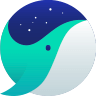
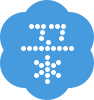

In [ ]:
# install chromium, its driver, and selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome('chromedriver',options=options)
wd.get("https://www.naver.com")
print(wd.page_source)  # results

작업관리자에 chromedriver.exe 프로세스가 생겼고,
브라우저가 오픈되고 네이버로 이동합니다.

프로그램 정상정료 되지 않으면
chromedriver.exe 프로세스는 계속 살아서 메모리를 점유합니다.

#### 예제

출처 : 출처: https://sacko.tistory.com/14?category=643535 [데이터 분석하는 문과생, 싸코]

In [ ]:
from selenium import webdriver
 
#selenium의 webdriver로 크롬 브라우저를 실행한다
driver = webdriver.Chrome('chromedriver',options=options)
 
#"Google"에 접속한다
driver.get("http://www.google.co.kr")
 
#페이지의 제목을 체크하여 'Google'에 제대로 접속했는지 확인한다
assert "Google" in driver.title, 'google에 제대로 접속'
# assert "naver" in driver.title , 'naver에 제대로 접속'
 
#검색 입력 부분에 커서를 올리고
#검색 입력 부분에 다양한 명령을 내리기 위해 elem 변수에 할당한다
elem = driver.find_element_by_name("q")
 
#입력 부분에 default로 값이 있을 수 있어 비운다
elem.clear()
 
#검색어를 입력한다
elem.send_keys("Selenium")
 
#검색을 실행한다
elem.submit()
 
#검색이 제대로 됐는지 확인한다
assert "No results found." not in driver.page_source
 
#브라우저를 종료한다
driver.close()

## 네이버 베스트셀러 주간 순위에 있는 책의 정보를 가져오는 예제

In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup


url = "https://book.naver.com/bestsell/bestseller_list.nhn"

driver = webdriver.Chrome('chromedriver',options=options)
driver.implicitly_wait(30)


# 네이버의 베스트셀러 웹페이지를 가져옵니다.
driver.get(url)
bsObject = BeautifulSoup(driver.page_source, 'html.parser')



# 책의 상세 웹페이지 주소를 추출하여 리스트에 저장합니다.
book_page_urls = []
for index in range(0, 25):
    dl_data = bsObject.find('dt', {'id':"book_title_"+str(index)})
    link = dl_data.select('a')[0].get('href')
    book_page_urls.append(link)



# 메타 정보와 본문에서 필요한 정보를 추출합니다.
for index, book_page_url in enumerate(book_page_urls):

    driver.get(book_page_url)
    bsObject = BeautifulSoup(driver.page_source, 'html.parser')


    title = bsObject.find('meta', {'property':'og:title'}).get('content')
    author = bsObject.find('dt', text='저자').find_next_siblings('dd')[0].text.strip()
    image = bsObject.find('meta', {'property':'og:image'}).get('content')
    url = bsObject.find('meta', {'property':'og:url'}).get('content')

    dd = bsObject.find('dt', text='가격').find_next_siblings('dd')[0]
    salePrice = dd.select('div.lowest strong')[0].text
    originalPrice = dd.select('div.lowest span.price')[0].text

    print(index+1, title, author, image, url, originalPrice, salePrice)



1 달러구트 꿈 백화점 2 이미예 https://bookthumb-phinf.pstatic.net/cover/207/771/20777131.jpg?type=m5 http://book.naver.com/bookdb/book_detail.naver?bid=20777131 13,800원 12,420원
2 달러구트 꿈 백화점 1 이미예 https://bookthumb-phinf.pstatic.net/cover/164/054/16405427.jpg?type=m5 http://book.naver.com/bookdb/book_detail.naver?bid=16405427 13,800원 12,420원
3 미래의 부 이지성 https://bookthumb-phinf.pstatic.net/cover/207/909/20790948.jpg?type=m5 http://book.naver.com/bookdb/book_detail.naver?bid=20790948 17,000원 15,300원
4 오늘 밤, 세계에서 이 사랑이 사라진다 해도 이치조 미사키 https://bookthumb-phinf.pstatic.net/cover/206/578/20657805.jpg?type=m5 http://book.naver.com/bookdb/book_detail.naver?bid=20657805 14,000원 12,600원
5 친일파 열전 박시백 https://bookthumb-phinf.pstatic.net/cover/208/079/20807929.jpg?type=m5 http://book.naver.com/bookdb/book_detail.naver?bid=20807929 16,000원 14,400원
6 미드나잇 라이브러리 매트 헤이그 https://bookthumb-phinf.pstatic.net/cover/190/075/19007535.jpg?type=m5 http://book.naver.com/bookdb/book_detail.naver?bid=19007535 15,800원 14,220원


## 교보문고 베스트셀러 주간 순위에 있는 책의 정보

In [ ]:

# -*- coding: utf-8 -*-

from urllib.request import urlopen
from bs4 import BeautifulSoup



# 교보문고의 베스트셀러 웹페이지를 가져옵니다.
html = urlopen('http://www.kyobobook.co.kr/bestSellerNew/bestseller.laf')
bsObject = BeautifulSoup(html, "html.parser")



# 책의 상세 웹페이지 주소를 추출하여 리스트에 저장합니다.
book_page_urls = []
for cover in bsObject.find_all('div', {'class':'detail'}):
    link = cover.select('a')[0].get('href')
    book_page_urls.append(link)


# 메타 정보로부터 필요한 정보를 추출합니다.메타 정보에 없는 저자 정보만 따로 가져왔습니다.  
for index, book_page_url in enumerate(book_page_urls):
    html = urlopen(book_page_url)
    bsObject = BeautifulSoup(html, "html.parser")
    title = bsObject.find('meta', {'property':'og:title'}).get('content')
    author = bsObject.select('span.name a')[0].text
    image = bsObject.find('meta', {'property':'og:image'}).get('content')
    url = bsObject.find('meta', {'property':'og:url'}).get('content')
    Price = bsObject.find('meta', {'property': 'og:price'}).get('content')

    print(index+1, title, author, image, url, Price)

1 달러구트 꿈 백화점. 2 - 교보문고 이미예 http://image.kyobobook.co.kr/images/book/xlarge/729/x9791165343729.jpg http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&barcode=9791165343729 12420
2 달러구트 꿈 백화점 - 교보문고 이미예 http://image.kyobobook.co.kr/images/book/xlarge/909/x9791165341909.jpg http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&barcode=9791165341909 12420
3 ¼ÒÅ©¶óÅ×½º ÀÍ½ºÇÁ·¹½º - ±³º¸¹®°í ¿¡¸¯ ¿ÍÀÌ³Ê http://image.kyobobook.co.kr/images/book/xlarge/922/x9791190030922.jpg http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&barcode=9791190030922 16200
4 오늘 밤, 세계에서 이 사랑이 사라진다 해도 - 교보문고 이치조 미사키 http://image.kyobobook.co.kr/images/book/xlarge/297/x9791191043297.jpg http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&barcode=9791191043297 12600
5 지구 끝의 온실 - 교보문고 김초엽 http://image.kyobobook.co.kr/images/book/xlarge/001/x9791191824001.jpg http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&b

# 명언+위인 가져오기(Selenium)

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

In [ ]:
# install chromium, its driver, and selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
#chrome Browser 옵션 사용
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

#3초 대기
driver.implicitly_wait(3)

driver = webdriver.Chrome('chromedriver',options=options)
#자동화 대상 site
driver.get('https://quotes.toscrape.com/')

#login butto click
site_login = driver.find_element_by_xpath('/html/body/div/div[1]/div[2]/p/a')
site_login.click()

#login id / pw 지정
login_id = 'youngpyoryu' 
login_pw = 'youngpyoryu'

#id login
id = driver.find_element_by_name('username').send_keys(login_id)
#pw login
pw = driver.find_element_by_name('password').send_keys(login_pw)

#login button click
login_click = driver.find_element_by_xpath('/html/body/div/form/input[2]')
login_click.click

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubun

<bound method WebElement.click of <selenium.webdriver.remote.webelement.WebElement (session="b4d00f3e6da940932b59afc4f22fd714", element="3199ac87-8f6a-412b-8ef9-e899af3c428e")>>